# Import necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from PIL import Image
import random
import cv2
import albumentations as A
from tqdm import tqdm
import shutil

KeyboardInterrupt: 

# Dataset Processing
---

## ISIC2016

### Train

In [ ]:
# Updated the train csv file
df = pd.read_csv(r'D:/T2420322 Dataset/ISIC2016/Train/ISBI2016_ISIC_Part3B_Training_GroundTruth.csv', header=None, names=['image_id', 'label'])
print(f"Sample of the dataframe:\n {df.head(5)} ")

df['masked_id'] = df['image_id'].apply(lambda x: os.path.join(r'masks', f'{x}_Segmentation.png'))

df['image_id'] = df['image_id'].apply(lambda x: os.path.join(r'images', f'{x}.jpg'))

# Save the updated dataframe to a new CSV file
df.to_csv(r'D:/T2420322 Dataset/ISIC2016/Train/updated_dataset.csv', index=False)


Sample of the dataframe:
        image_id      label
0  ISIC_0000000     benign
1  ISIC_0000001     benign
2  ISIC_0000002  malignant
3  ISIC_0000004  malignant
4  ISIC_0000006     benign 


Sample of the dataframe:
        image_id       mask_id lesion_type
0  ISIC_0000000  ISIC_0000000      benign
1  ISIC_0000001  ISIC_0000001      benign
2  ISIC_0000002  ISIC_0000002   malignant
3  ISIC_0000004  ISIC_0000004   malignant
4  ISIC_0000006  ISIC_0000006      benign 


C:\Users\T2420322\AppData\Local\Temp\ipykernel_28632\3112676310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lesion_counts.index, y=lesion_counts.values, palette='tab10')


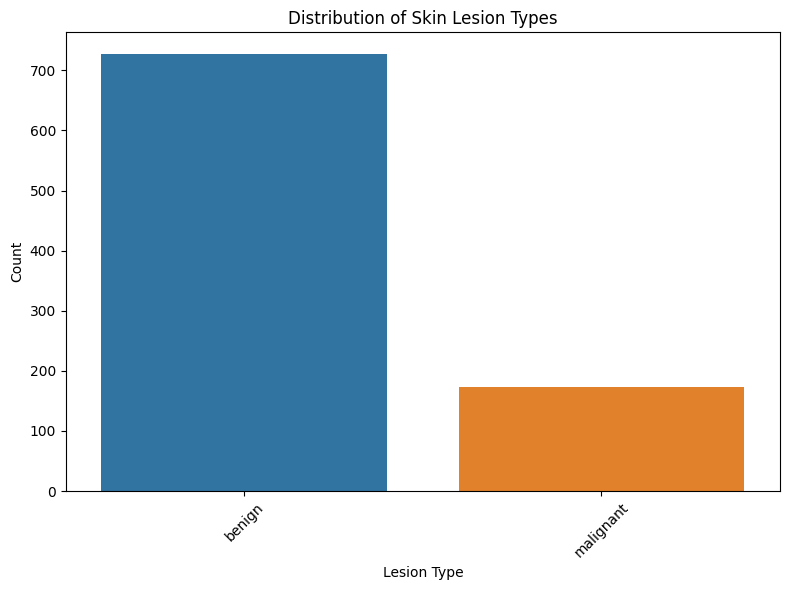


Lesion type counts:
benign: 727
malignant: 173


In [ ]:
df = pd.read_csv('D:/T2420322 Dataset/ISIC2016/Train/updated_training_data_with_masks.csv')
print(f"Sample of the dataframe:\n {df.head(5)} ")
# Count and visualize lesion types
lesion_counts = df['lesion_type'].value_counts()

#Plot for lesion counts
plt.figure(figsize=(8, 6))
sns.barplot(x=lesion_counts.index, y=lesion_counts.values, palette='tab10')
plt.title('Distribution of Skin Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the lesion type counts
print("\nLesion type counts:")
for lesion_type, count in lesion_counts.items():
    print(f"{lesion_type}: {int(count)}")


### Test

In [ ]:
# Updated the train csv file
df = pd.read_csv(r'D:/T2420322 Dataset/ISIC2016/Test/ISBI2016_ISIC_Part3B_Test_GroundTruth.csv', header=None, names=['image_id', 'label'])
print(f"Sample of the dataframe:\n {df.head(5)} ")

df['masked_id'] = df['image_id'].apply(lambda x: os.path.join(r'masks', f'{x}_Segmentation.png'))

df['image_id'] = df['image_id'].apply(lambda x: os.path.join(r'images', f'{x}.jpg'))

# Save the updated dataframe to a new CSV file
df.to_csv(r'D:/T2420322 Dataset/ISIC2016/Test/updated_test_dataset.csv', index=False)


Sample of the dataframe:
        image_id  label
0  ISIC_0000003    0.0
1  ISIC_0000012    0.0
2  ISIC_0000013    1.0
3  ISIC_0000014    0.0
4  ISIC_0000015    0.0 


Sample of the dataset:
                   image_id                            masked_id      label
0  images\ISIC_0000003.jpg  masks\ISIC_0000003_Segmentation.png     Benign
1  images\ISIC_0000012.jpg  masks\ISIC_0000012_Segmentation.png     Benign
2  images\ISIC_0000013.jpg  masks\ISIC_0000013_Segmentation.png  Malignant
3  images\ISIC_0000014.jpg  masks\ISIC_0000014_Segmentation.png     Benign
4  images\ISIC_0000015.jpg  masks\ISIC_0000015_Segmentation.png     Benign


C:\Users\T2420322\AppData\Local\Temp\ipykernel_28632\1343514388.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lesion_counts.index, y=lesion_counts.values, palette='tab10')


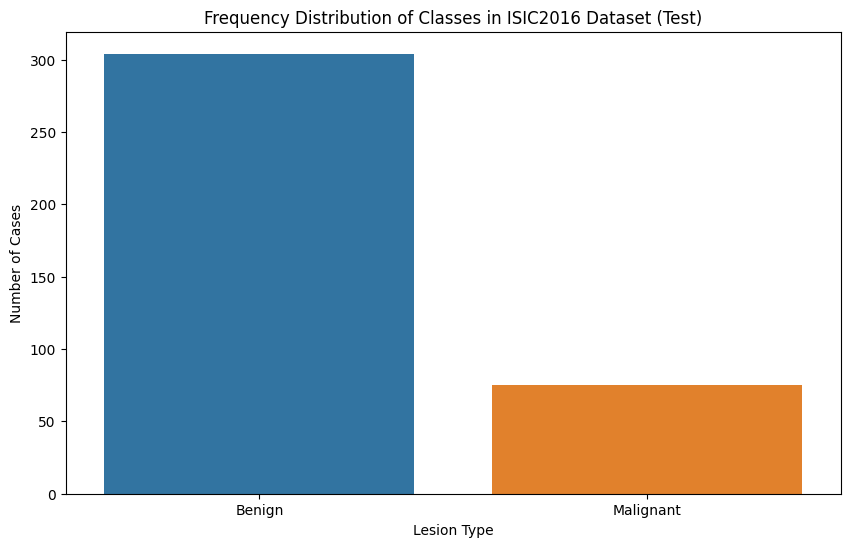

There are 379 images in the dataset.


In [ ]:

data = pd.read_csv('D:/T2420322 Dataset/ISIC2016/Test/updated_test_dataset.csv')

# Replace the labels 0 and 1 with 'Benign' and 'Malignant'
data['label'] = data['label'].map({0.0: 'Benign', 1.0: 'Malignant'})

# Save the updated DataFrame to a new CSV file
output_file_path = 'D:/T2420322 Dataset/ISIC2016/Test/updated_test_dataset.csv'
data.to_csv(output_file_path, index=False)

data=pd.read_csv('D:/T2420322 Dataset/ISIC2016/Test/updated_test_dataset.csv')
print(f"Sample of the dataset:\n {data.head(5)}")

# Count the distinct cases of skin lesions if present in a column
if 'label' in data.columns:
    # Count occurrences of each type of lesion
    lesion_counts = data['label'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=lesion_counts.index, y=lesion_counts.values, palette='tab10')
    plt.title('Frequency Distribution of Classes in ISIC2016 Dataset (Test)')
    plt.xlabel('Lesion Type')
    plt.ylabel('Number of Cases')
    plt.show()
else:
    print("The dataset does not have a 'label' column. Please check your dataset structure.")

print(f'There are {len(data)} images in the dataset.')


## HAM10000

C:\Users\T2420322\AppData\Local\Temp\ipykernel_28632\3102985809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lesion_counts.index, y=lesion_counts.values,palette='tab20c')


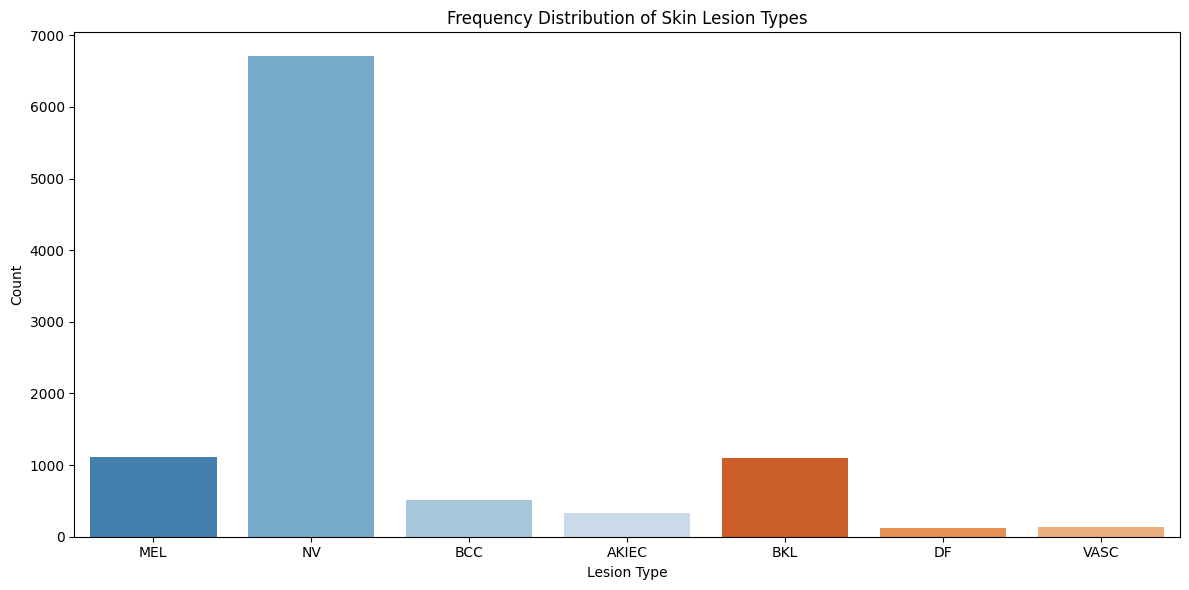


Lesion type counts:
MEL: 1113
NV: 6705
BCC: 514
AKIEC: 327
BKL: 1099
DF: 115
VASC: 142


In [ ]:
# Read the CSV file
df = pd.read_csv('D:\\T2420322 Dataset\\ham10K\\GroundTruth.csv')

# 1. Count and visualize lesion types
lesion_counts = df.iloc[:, 1:].sum()

# Create bar plot for lesion counts
plt.figure(figsize=(12, 6))
sns.barplot(x=lesion_counts.index, y=lesion_counts.values,palette='tab20c')
plt.title('Frequency Distribution of Skin Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()

# Print the counts
print("\nLesion type counts:")
for lesion_type, count in lesion_counts.items():
    print(f"{lesion_type}: {int(count)}")

## 2. Show 8 random images with their masks
---

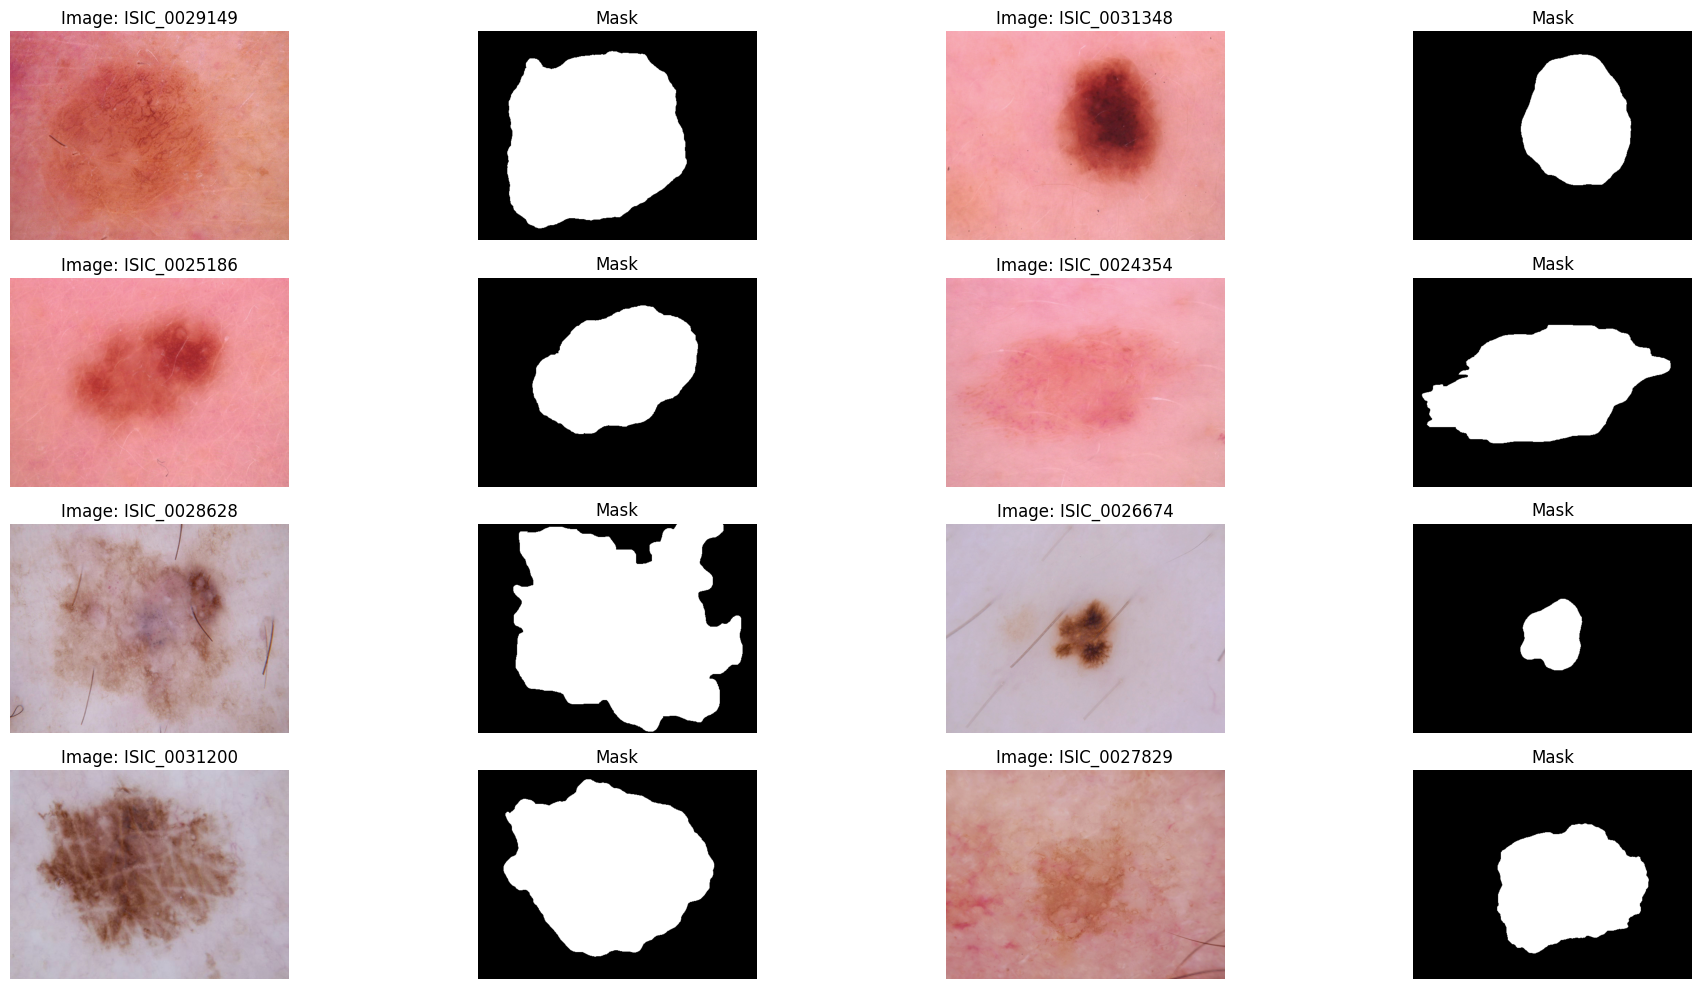

In [ ]:
# 2. Show 8 random images with their masks
plt.figure(figsize=(20, 10))
random_indices = np.random.choice(len(df), 8, replace=False)

for idx, i in enumerate(random_indices):
    image_name = df.iloc[i]['image']

    # Load image
    img_path = os.path.join('D:\\T2420322 Dataset\\ham10K\\images', f"{image_name}.jpg")
    mask_path = os.path.join('D:\\T2420322 Dataset\\ham10K\\masks', f"{image_name}_segmentation.png")

    img = Image.open(img_path)
    mask = Image.open(mask_path)

    # Plot original image
    plt.subplot(4, 4, 2*idx + 1)
    plt.imshow(img)
    plt.title(f'Image: {image_name}')
    plt.axis('off')

    # Plot mask
    plt.subplot(4, 4, 2*idx + 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()


Present lesion types: ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']


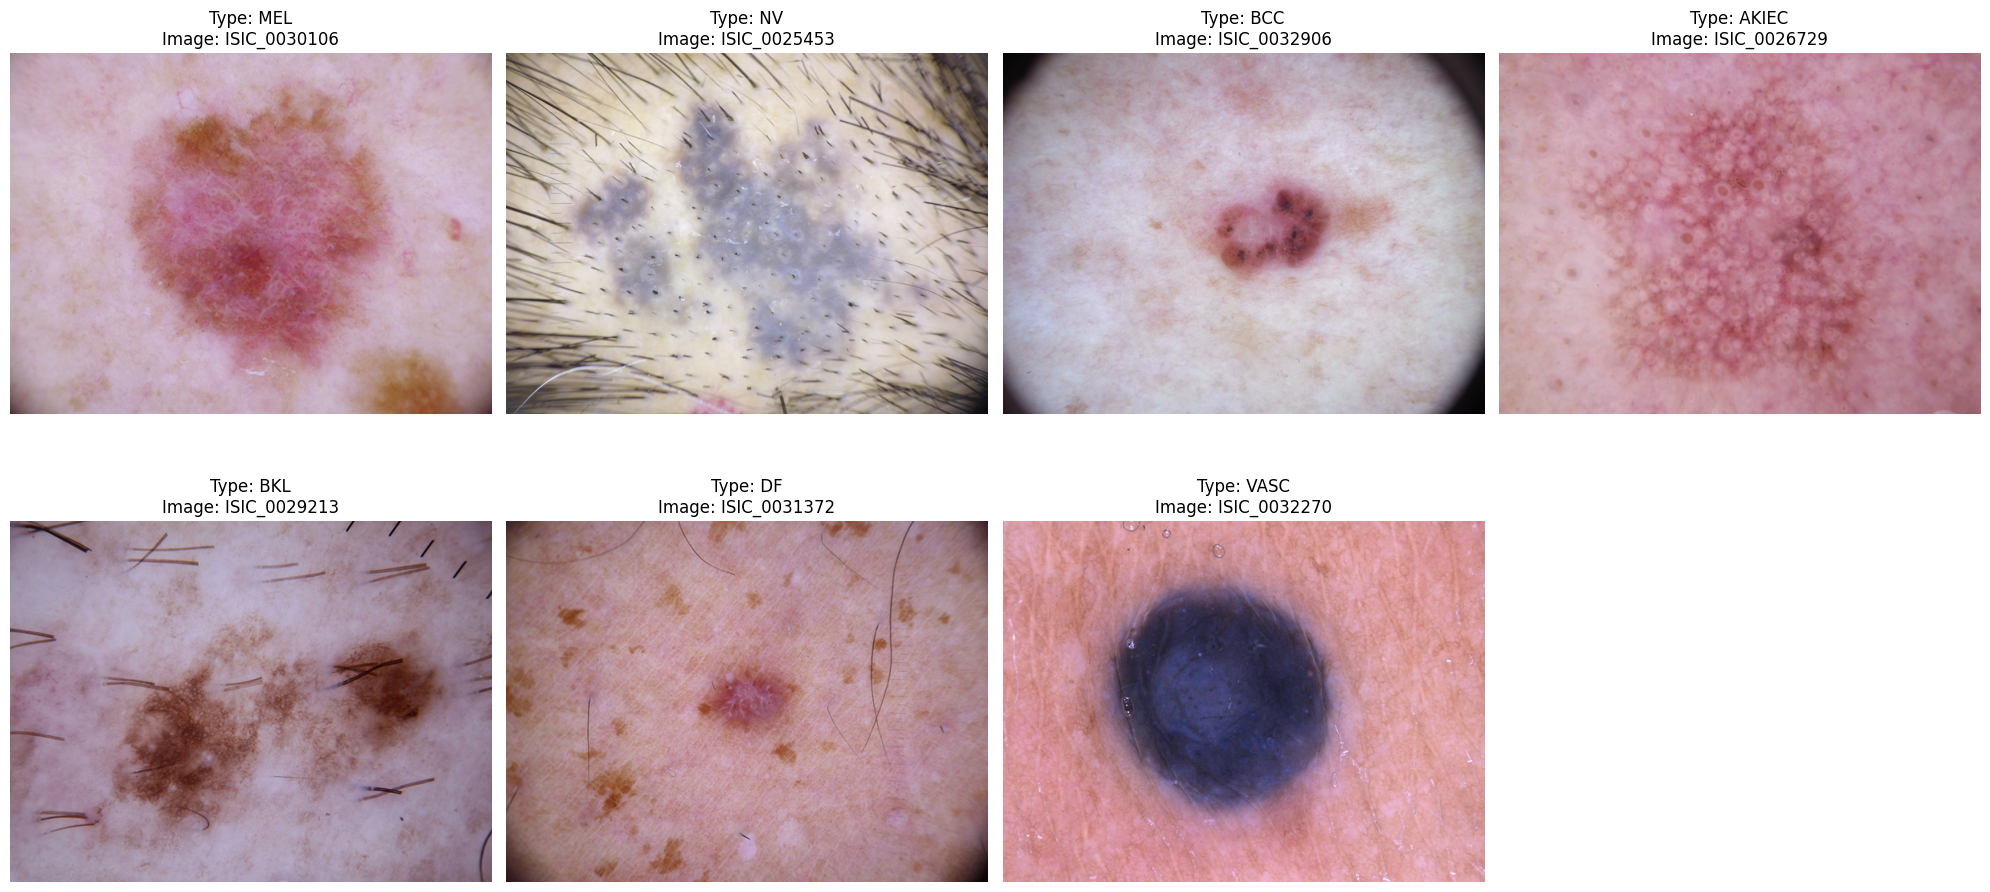

In [ ]:
lesion_types = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

print("Present lesion types:",lesion_types)

plt.figure(figsize=(20, 10))

for idx, lesion_type in enumerate(lesion_types):

    images_with_lesion = df[df[lesion_type] == 1]['image'].values

    if len(images_with_lesion) > 0:

        random_image = np.random.choice(images_with_lesion)

        img_path = os.path.join('D:\\T2420322 Dataset\\ham10K\\images', f"{random_image}.jpg")

        plt.subplot(2, 4, idx + 1)

        try:
            # Load and display the image
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f'Type: {lesion_type}\nImage: {random_image}')
        except Exception as e:
            # If image loading fails, display error text
            plt.text(0.5, 0.5, f'Type: {lesion_type}\nImage not found:\n{random_image}',
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=plt.gca().transAxes)

        plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import shutil

# Define paths
csv_file_path = 'D:\\T2420322 Dataset\\ham10K\\GroundTruth.csv'
images_folder = 'D:\\T2420322 Dataset\\ham10K\\images'
masks_folder = 'D:\\T2420322 Dataset\\ham10K\\masks'
output_folder = 'D:\\T2420322 Dataset\\ham10K\\organized_lesions'

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the CSV file
data = pd.read_csv(csv_file_path)

# Iterate through the CSV rows
for index, row in data.iterrows():
    image_name = row['image']  # Column for the image filename without extension

    # Add the jpg extension to the image name
    image_filename = f"{image_name}.jpg"
    mask_filename = f"{image_name}_segmentation.png"

    # Determine the lesion type based on the one-hot encoded columns
    lesion_types = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
    lesion_type = None
    for lesion in lesion_types:
        if row[lesion] == 1:
            lesion_type = lesion
            break

    # Skip if no lesion type is identified
    if lesion_type is None:
        print(f"No lesion type found for image: {image_name}")
        continue

    # Create lesion-specific folder structure
    lesion_folder = os.path.join(output_folder, lesion_type)
    lesion_images_folder = os.path.join(lesion_folder, 'images')
    lesion_masks_folder = os.path.join(lesion_folder, 'masks')

    os.makedirs(lesion_images_folder, exist_ok=True)
    os.makedirs(lesion_masks_folder, exist_ok=True)

    # Paths for image and mask
    image_path = os.path.join(images_folder, image_filename)
    mask_path = os.path.join(masks_folder, mask_filename)

    # Copy image and mask to the respective folders
    if os.path.exists(image_path):
        shutil.copy(image_path, lesion_images_folder)
    else:
        print(f"Image not found: {image_path}")

    if os.path.exists(mask_path):
        shutil.copy(mask_path, lesion_masks_folder)
    else:
        print(f"Mask not found: {mask_path}")

print("Organizing completed.")

Organizing completed.


# Classwise Train, Valid, Test split

In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 812.7 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/11.0 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 5.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 8.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.6/11.0 MB 13.3 MB/s eta 0:00:01
   ------------------------------- -------- 8.5/11.0 MB 21.8 MB/s eta 0:00:01
   ---------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import shutil
import pandas as pd
# pip install -U scikit-learn
from sklearn.model_selection import train_test_split

def create_directories(base_dir):
    """
    Create train, validation, and test directories for images and masks.
    """
    for split in ['train', 'valid', 'test']:
        os.makedirs(os.path.join(base_dir, split, 'images'), exist_ok=True)
        os.makedirs(os.path.join(base_dir, split, 'masks'), exist_ok=True)

def copy_files(data, split, image_dir, mask_dir, output_dir):
    """
    Copy image and mask files to the respective directories.
    """
    for image, mask in data:
        shutil.copy2(os.path.join(image_dir, image), os.path.join(output_dir, split, 'images', image))
        shutil.copy2(os.path.join(mask_dir, mask), os.path.join(output_dir, split, 'masks', mask))

def split_data(image_dir, mask_dir, output_dir, train_ratio=0.8, valid_ratio=0.1, seed=42):
    """
    Split the dataset into train, validation, and test sets.

    Args:
        image_dir: Directory containing the images.
        mask_dir: Directory containing the masks.
        output_dir: Directory to save the split data.
        train_ratio: Proportion of data to be used for training.
        valid_ratio: Proportion of data to be used for validation.
        seed: Random seed for reproducibility.
    """
    # List all images and masks
    images = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
    masks = [f.replace('.jpg', '_Segmentation.png') for f in images]

    # Split data into train and temp (for further splitting into valid and test)
    train_images, temp_images, train_masks, temp_masks = train_test_split(
        images, masks, train_size=train_ratio, random_state=seed)

    # Calculate the ratio for validation and test splits
    valid_ratio_adjusted = valid_ratio / (1 - train_ratio)

    # Split the temp data into validation and test sets
    valid_images, test_images, valid_masks, test_masks = train_test_split(
        temp_images, temp_masks, test_size=valid_ratio_adjusted, random_state=seed)

    # Copy files to respective directories
    copy_files(zip(train_images, train_masks), 'train', image_dir, mask_dir, output_dir)
    copy_files(zip(valid_images, valid_masks), 'valid', image_dir, mask_dir, output_dir)
    copy_files(zip(test_images, test_masks), 'test', image_dir, mask_dir, output_dir)

    print(f"Data successfully split into train, validation, and test sets for {output_dir}.")

# Define directories
base_dir = 'D:\\T2420322 Dataset\\ham10K\\organized_lesions'
output_dir = 'D:\\T2420322 Dataset\\ham10K\\split_data'

# List all class directories
class_dirs = [os.path.join(base_dir, class_dir) for class_dir in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, class_dir))]

# Split data for each class
for class_dir in class_dirs:
    image_dir = os.path.join(class_dir, 'images')
    mask_dir = os.path.join(class_dir, 'masks')
    class_output_dir = os.path.join(output_dir, os.path.basename(class_dir))
    
    # Create output directories for the current class
    create_directories(class_output_dir)
    
    # Split the data
    split_data(image_dir, mask_dir, class_output_dir)

print("All data has been successfully split into train, validation, and test sets.")


Data successfully split into train, validation, and test sets for D:\T2420322 Dataset\ham10K\split_data\AKIEC.
Data successfully split into train, validation, and test sets for D:\T2420322 Dataset\ham10K\split_data\BCC.
Data successfully split into train, validation, and test sets for D:\T2420322 Dataset\ham10K\split_data\BKL.
Data successfully split into train, validation, and test sets for D:\T2420322 Dataset\ham10K\split_data\DF.
Data successfully split into train, validation, and test sets for D:\T2420322 Dataset\ham10K\split_data\MEL.
Data successfully split into train, validation, and test sets for D:\T2420322 Dataset\ham10K\split_data\NV.
Data successfully split into train, validation, and test sets for D:\T2420322 Dataset\ham10K\split_data\VASC.
All data has been successfully split into train, validation, and test sets.


# Trial 3

## Augmentation Without NV

In [ ]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import shutil

def create_augmentation_pipeline():
    """
    Create an augmentation pipeline using albumentations.
    Always resize to 256x256 at the end of the pipeline.
    Includes normalization of the images.
    """
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(
            brightness_limit=0.2,
            contrast_limit=0.2,
            p=0.5
        ),
        A.RandomGamma(gamma_limit=(80, 120), p=0.5),
        A.OneOf([
            A.ElasticTransform(
                p=1.0, 
                alpha=120, 
                sigma=6,
                alpha_affine=None
            ),
            A.GridDistortion(p=1.0),
            A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1.0),
        ], p=0.3),
        # Always resize to 256x256
        A.Resize(height=256, width=256, always_apply=True)
    ])

def create_directories(base_dir):
    """
    Create augmented directories following the same structure as original data.
    """
    for split in ['train', 'valid', 'test']:
        os.makedirs(os.path.join(base_dir, split, 'images'), exist_ok=True)
        os.makedirs(os.path.join(base_dir, split, 'masks'), exist_ok=True)

def load_image_and_mask(image_path, mask_path):
    """
    Load and preprocess image and mask files.
    - Resize to 256x256
    - Binarize mask
    """
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize image to 256x256
    image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
    
    # Load mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize mask to 256x256
    mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)
    
    # Binarize mask (threshold at 128)
    _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
    
    return image, mask

def save_image_and_mask(image, mask, image_path, mask_path):
    """
    Save processed image and mask files.
    Ensures final size is 256x256 and mask is binary.
    """
    # Convert RGB to BGR for saving
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Final resize check for image (should already be 256x256)
    if image_bgr.shape[:2] != (256, 256):
        image_bgr = cv2.resize(image_bgr, (256, 256), interpolation=cv2.INTER_AREA)
    
    # Final check for mask size and binarization
    if mask.shape != (256, 256):
        mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)
    
    # Ensure mask is binary
    _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
    
    # Save files
    cv2.imwrite(image_path, image_bgr)
    cv2.imwrite(mask_path, mask)

def verify_image_mask(image_path, mask_path):
    """
    Verify that saved image and mask meet requirements:
    - 256x256 size
    - Mask is binary
    """
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    # Check sizes
    assert image.shape[:2] == (256, 256), f"Image size incorrect: {image.shape}"
    assert mask.shape == (256, 256), f"Mask size incorrect: {mask.shape}"
    
    # Check mask is binary
    unique_values = np.unique(mask)
    assert len(unique_values) <= 2 and all(v in [0, 255] for v in unique_values), \
        f"Mask is not binary: contains values {unique_values}"

def augment_dataset(input_dir, output_dir, augmentations_per_image=3):
    """
    Augment images and masks while maintaining the original directory structure.
    Skips augmentation for NV cases.
    """
    # Create augmentation pipeline
    transform = create_augmentation_pipeline()
    
    # Process each class directory
    class_dirs = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]
    
    for class_dir in class_dirs:
        print(f"Processing class: {class_dir}")
        
        # Skip augmentation for NV cases
        if (class_dir == 'NV'):
            print(f"Skipping augmentation for {class_dir} class")
            
            # Just copy the original files without augmentation
            shutil.copytree(
                os.path.join(input_dir, class_dir), 
                os.path.join(output_dir, class_dir), 
                dirs_exist_ok=True
            )
            continue
        
        class_input_path = os.path.join(input_dir, class_dir)
        class_output_path = os.path.join(output_dir, class_dir)
        
        # Create output directories
        create_directories(class_output_path)
        
        # Process each split (train, valid, test)
        for split in ['train', 'valid', 'test']:
            print(f"Processing {split} split...")
            
            # Setup paths
            split_images_dir = os.path.join(class_input_path, split, 'images')
            split_masks_dir = os.path.join(class_input_path, split, 'masks')
            
            output_images_dir = os.path.join(class_output_path, split, 'images')
            output_masks_dir = os.path.join(class_output_path, split, 'masks')
            
            # List of images
            images = [f for f in os.listdir(split_images_dir) if f.endswith('.jpg')]
            
            # Process original files
            for img_name in images:
                mask_name = img_name.replace('.jpg', '_Segmentation.png')
                
                # Load and process original files
                image, mask = load_image_and_mask(
                    os.path.join(split_images_dir, img_name),
                    os.path.join(split_masks_dir, mask_name)
                )
                
                # Save processed original files
                save_image_and_mask(
                    image, mask,
                    os.path.join(output_images_dir, img_name),
                    os.path.join(output_masks_dir, mask_name)
                )
                
                # Verify saved files
                verify_image_mask(
                    os.path.join(output_images_dir, img_name),
                    os.path.join(output_masks_dir, mask_name)
                )
            
            # Apply augmentations to other class folders
            for img_name in tqdm(images, desc=f"Augmenting {split} images"):
                mask_name = img_name.replace('.jpg', '_Segmentation.png')
                
                # Load image and mask
                image, mask = load_image_and_mask(
                    os.path.join(split_images_dir, img_name),
                    os.path.join(split_masks_dir, mask_name)
                )
                
                # Create augmented versions
                for i in range(augmentations_per_image):
                    # Apply augmentation
                    augmented = transform(image=image, mask=mask)
                    aug_image = augmented['image']
                    aug_mask = augmented['mask']
                    
                    # Generate new filenames
                    aug_img_name = f"{img_name.split('.')[0]}_aug_{i+1}.jpg"
                    aug_mask_name = f"{mask_name.split('.')[0]}_aug_{i+1}.png"
                    
                    # Save augmented files
                    save_image_and_mask(
                        aug_image, aug_mask,
                        os.path.join(output_images_dir, aug_img_name),
                        os.path.join(output_masks_dir, aug_mask_name)
                    )
                    
                    # Verify saved files
                    verify_image_mask(
                        os.path.join(output_images_dir, aug_img_name),
                        os.path.join(output_masks_dir, aug_mask_name)
                    )

# Paths
input_dir = 'D:/T2420322 Dataset/ham10K/split_data'
output_dir = 'D:/T2420322 Dataset/ham10K/aug_split_data01'

# Run augmentation
augment_dataset(input_dir, output_dir)

print("Augmentation completed successfully!")


C:\Users\T2420322\AppData\Local\Temp\ipykernel_28632\2534739418.py:25: UserWarning: Argument 'alpha_affine' is not valid and will be ignored.
  A.ElasticTransform(


Processing class: AKIEC
Processing train split...


Augmenting train images: 100%|██████████| 261/261 [00:10<00:00, 24.79it/s]


Processing valid split...


Augmenting valid images: 100%|██████████| 32/32 [00:01<00:00, 24.50it/s]


Processing test split...


Augmenting test images: 100%|██████████| 34/34 [00:01<00:00, 25.33it/s]


Processing class: BCC
Processing train split...


Augmenting train images: 100%|██████████| 411/411 [00:16<00:00, 24.65it/s]


Processing valid split...


Augmenting valid images: 100%|██████████| 51/51 [00:02<00:00, 24.56it/s]


Processing test split...


Augmenting test images: 100%|██████████| 52/52 [00:02<00:00, 24.27it/s]


Processing class: BKL
Processing train split...


Augmenting train images: 100%|██████████| 879/879 [00:37<00:00, 23.19it/s]


Processing valid split...


Augmenting valid images: 100%|██████████| 109/109 [00:04<00:00, 23.00it/s]


Processing test split...


Augmenting test images: 100%|██████████| 111/111 [00:04<00:00, 23.22it/s]


Processing class: DF
Processing train split...


Augmenting train images: 100%|██████████| 92/92 [00:03<00:00, 23.83it/s]


Processing valid split...


Augmenting valid images: 100%|██████████| 11/11 [00:00<00:00, 23.49it/s]


Processing test split...


Augmenting test images: 100%|██████████| 12/12 [00:00<00:00, 24.85it/s]


Processing class: MEL
Processing train split...


Augmenting train images: 100%|██████████| 890/890 [00:36<00:00, 24.42it/s]


Processing valid split...


Augmenting valid images: 100%|██████████| 111/111 [00:04<00:00, 25.59it/s]


Processing test split...


Augmenting test images: 100%|██████████| 112/112 [00:04<00:00, 25.37it/s]


Processing class: NV
Skipping augmentation for NV class
Processing class: VASC
Processing train split...


Augmenting train images: 100%|██████████| 113/113 [00:04<00:00, 26.17it/s]


Processing valid split...


Augmenting valid images: 100%|██████████| 14/14 [00:00<00:00, 24.22it/s]


Processing test split...


Augmenting test images: 100%|██████████| 15/15 [00:00<00:00, 26.96it/s]

Augmentation completed successfully!


In [ ]:
import os
import pandas as pd
from pathlib import Path

def create_augmented_csv(original_csv_path, augmented_data_path, output_csv_path):
    """
    Create a CSV file for augmented data with image paths and labels.
    
    Args:
        original_csv_path: Path to the original gt.csv
        augmented_data_path: Path to the augmented dataset directory
        output_csv_path: Path where the new CSV will be saved
    """
    # Read original CSV
    original_df = pd.read_csv(original_csv_path)
    
    # Initialize lists to store data
    data = []
    
    # Process each class directory
    class_dirs = [d for d in os.listdir(augmented_data_path) if os.path.isdir(os.path.join(augmented_data_path, d))]
    
    for split in ['train', 'valid', 'test']:
        for class_dir in class_dirs:
            images_dir = Path(augmented_data_path) / class_dir / split / 'images'
            masks_dir = Path(augmented_data_path) / class_dir / split / 'masks'
            
            if not images_dir.exists():
                continue
                
            for img_path in images_dir.glob('*.jpg'):
                # Get base image name (without augmentation suffix)
                base_name = img_path.stem.split('_aug')[0]
                mask_path = masks_dir / f"{img_path.stem}.png"
                
                # Find corresponding labels in original CSV
                original_entry = original_df[original_df['image'] == base_name]
                
                if not original_entry.empty:
                    labels = original_entry.iloc[0][['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']].values
                    
                    # Add entry to data list
                    data.append({
                        'image_path': str(img_path),
                        'mask_path': str(mask_path),
                        'split': split,
                        'MEL': labels[0],
                        'NV': labels[1],
                        'BCC': labels[2],
                        'AKIEC': labels[3],
                        'BKL': labels[4],
                        'DF': labels[5],
                        'VASC': labels[6]
                    })
    
    # Create DataFrame and save to CSV
    augmented_df = pd.DataFrame(data)
    augmented_df.to_csv(output_csv_path, index=False)
    print(f"Created augmented CSV at {output_csv_path}")
    return augmented_df

# Usage
original_csv_path = 'D:\\T2420322 Dataset\\ham10K\\GroundTruth.csv'
augmented_data_path = 'D:\\T2420322 Dataset\\ham10K\\aug_split_data01'
output_csv_path = 'D:\\T2420322 Dataset\\ham10K\\augmented_gt01.csv'

augmented_df = create_augmented_csv(original_csv_path, augmented_data_path, output_csv_path)

Created augmented CSV at D:\T2420322 Dataset\ham10K\augmented_gt01.csv


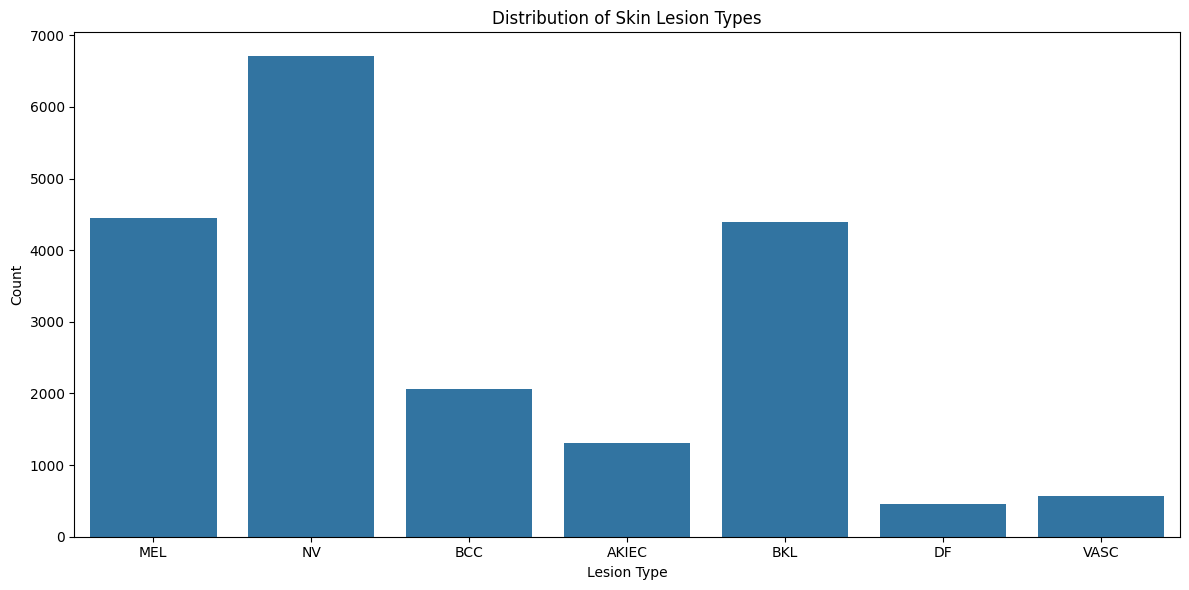


Lesion type counts:
MEL: 4452
NV: 6705
BCC: 2056
AKIEC: 1308
BKL: 4396
DF: 460
VASC: 568


In [ ]:

# Read the CSV file
df = pd.read_csv('D:\\T2420322 Dataset\\ham10K\\augmented_gt01.csv')

# 1. Count and visualize lesion types
lesion_counts = df.iloc[:, 3:].sum()

# Create bar plot for lesion counts
plt.figure(figsize=(12, 6))
sns.barplot(x=lesion_counts.index, y=lesion_counts.values)
plt.title('Distribution of Skin Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()

# Print the counts
print("\nLesion type counts:")
for lesion_type, count in lesion_counts.items():
    print(f"{lesion_type}: {int(count)}")

## Balaced augmentation

In [7]:
# finally
import os
import random
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import shutil
import pandas as pd

def create_augmentation_pipeline(seed=42):
    """
    Create a comprehensive augmentation pipeline using albumentations.
    """
    # Set the random seed
    random.seed(seed)
    np.random.seed(seed)
    
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(
            brightness_limit=0.2,
            contrast_limit=0.2,
            p=0.5
        ),
        A.RandomGamma(gamma_limit=(80, 120), p=0.5),
        A.OneOf([
            A.ElasticTransform(
                p=1.0, 
                alpha=120, 
                sigma=6,
                alpha_affine=None
            ),
            A.GridDistortion(p=1.0),
            A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1.0),
        ], p=0.3),
        # Always resize to 256x256
        A.Resize(height=256, width=256, always_apply=True)
    ])

def calculate_balancing_strategy(class_counts):
    """
    Calculate a proportional augmentation strategy.
    
    Parameters:
    -----------
    class_counts : dict
        Dictionary of original class counts
    
    Returns:
    --------
    dict
        Target counts for each class
    """
    # Find the median count as the target
    counts = list(class_counts.values())
    target_count = int(np.percentile(counts, 100))  # 100th percentile
    
    # Calculate augmentation needed for each class
    target_strategy = {}
    for cls, count in class_counts.items():
        if cls == max(class_counts, key=class_counts.get):
            # Skip the class with maximum samples
            target_strategy[cls] = count
        else:
            # Calculate proportional augmentation
            target_strategy[cls] = target_count
    
    return target_strategy

def augment_dataset(input_dir, output_dir, seed=42):
    """
    Dynamically augment images to balance dataset proportionally
    
    Parameters:
    -----------
    input_dir : str
        Path to input dataset
    output_dir : str
        Path to output augmented dataset
    seed : int, optional
        Random seed for reproducibility
    """
    # Set random seed
    random.seed(seed)
    np.random.seed(seed)
    
    # Create augmentation pipeline
    transform = create_augmentation_pipeline(seed)
    
    # Get original class counts
    class_counts = {}
    class_dirs = [d for d in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, d))]
    
    for class_dir in class_dirs:
        total_class_images = 0
        for split in ['train', 'valid', 'test']:
            split_images_dir = os.path.join(input_dir, class_dir, split, 'images')
            images = [f for f in os.listdir(split_images_dir) if f.endswith('.jpg')]
            total_class_images += len(images)
        class_counts[class_dir] = total_class_images
    
    # Calculate balancing strategy
    target_counts = calculate_balancing_strategy(class_counts)
    
    # Print original and target counts
    print("Original Class Counts:")
    for cls, count in class_counts.items():
        print(f"{cls}: {count}")
    
    print("\nTarget Counts:")
    for cls, count in target_counts.items():
        print(f"{cls}: {count}")
    
    # Process each class
    for class_dir in class_dirs:
        print(f"\nProcessing class: {class_dir}")
        
        class_input_path = os.path.join(input_dir, class_dir)
        class_output_path = os.path.join(output_dir, class_dir)
        
        # Skip the class with maximum samples
        if class_counts[class_dir] == max(class_counts.values()):
            print(f"Copying original images for {class_dir} (max sample class)")
            for split in ['train', 'valid', 'test']:
                input_split_images_dir = os.path.join(class_input_path, split, 'images')
                input_split_masks_dir = os.path.join(class_input_path, split, 'masks')
                
                output_split_images_dir = os.path.join(class_output_path, split, 'images')
                output_split_masks_dir = os.path.join(class_output_path, split, 'masks')
                
                os.makedirs(output_split_images_dir, exist_ok=True)
                os.makedirs(output_split_masks_dir, exist_ok=True)
                
                shutil.copytree(input_split_images_dir, output_split_images_dir, dirs_exist_ok=True)
                shutil.copytree(input_split_masks_dir, output_split_masks_dir, dirs_exist_ok=True)
            continue
        
        # Calculate augmentations needed
        augmentations_needed = target_counts[class_dir] - class_counts[class_dir]
        
        # Create output directories
        os.makedirs(class_output_path, exist_ok=True)
        for split in ['train', 'valid', 'test']:
            os.makedirs(os.path.join(class_output_path, split, 'images'), exist_ok=True)
            os.makedirs(os.path.join(class_output_path, split, 'masks'), exist_ok=True)
        
        # Distribute augmentations across splits proportionally
        for split in ['train', 'valid', 'test']:
            split_input_images_dir = os.path.join(class_input_path, split, 'images')
            split_input_masks_dir = os.path.join(class_input_path, split, 'masks')
            
            split_output_images_dir = os.path.join(class_output_path, split, 'images')
            split_output_masks_dir = os.path.join(class_output_path, split, 'masks')
            
            # Original images in this split
            orig_images = [f for f in os.listdir(split_input_images_dir) if f.endswith('.jpg')]
            
            # Calculate augmentations for this split
            split_aug_count = int(augmentations_needed * (len(orig_images) / class_counts[class_dir]))
            
            # Copy original images first
            for img_name in orig_images:
                mask_name = img_name.replace('.jpg', '_Segmentation.png')
                
                # Copy original image and mask
                shutil.copy(
                    os.path.join(split_input_images_dir, img_name),
                    os.path.join(split_output_images_dir, img_name)
                )
                shutil.copy(
                    os.path.join(split_input_masks_dir, mask_name),
                    os.path.join(split_output_masks_dir, mask_name)
                )
            
            # Perform augmentations
            aug_count = 0
            while aug_count < split_aug_count:
                for img_name in orig_images:
                    if aug_count >= split_aug_count:
                        break
                    
                    mask_name = img_name.replace('.jpg', '_Segmentation.png')
                    
                    # Load original image and mask
                    image = cv2.imread(os.path.join(split_input_images_dir, img_name))
                    mask = cv2.imread(os.path.join(split_input_masks_dir, mask_name), cv2.IMREAD_GRAYSCALE)
                    
                    # Convert BGR to RGB
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    
                    # Apply augmentation
                    augmented = transform(image=image, mask=mask)
                    aug_image = augmented['image']
                    aug_mask = augmented['mask']
                    
                    # Generate augmented filename
                    aug_img_name = f"{img_name.split('.')[0]}_aug_{aug_count}.jpg"
                    aug_mask_name = f"{mask_name.split('.')[0]}_aug_{aug_count}.png"
                    
                    # Save augmented image and mask
                    cv2.imwrite(
                        os.path.join(split_output_images_dir, aug_img_name), 
                        cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR)
                    )
                    cv2.imwrite(
                        os.path.join(split_output_masks_dir, aug_mask_name), 
                        aug_mask
                    )
                    
                    aug_count += 1
    
    print("\nDataset augmentation completed successfully!")


# Paths
input_dir = 'D:\\T2420322 Dataset\\ham10K\\split_data'
output_dir = 'D:\\T2420322 Dataset\\ham10K\\balanced_aug_Data03'

# Run augmentation
augment_dataset(input_dir, output_dir)


print("Dynamic dataset balancing completed successfully!")

C:\Users\T2420322\AppData\Local\Temp\ipykernel_20660\1350952242.py:30: UserWarning: Argument 'alpha_affine' is not valid and will be ignored.
  A.ElasticTransform(


Original Class Counts:
AKIEC: 327
BCC: 514
BKL: 1099
DF: 115
MEL: 1113
NV: 6705
VASC: 142

Target Counts:
AKIEC: 6705
BCC: 6705
BKL: 6705
DF: 6705
MEL: 6705
NV: 6705
VASC: 6705

Processing class: AKIEC

Processing class: BCC

Processing class: BKL

Processing class: DF

Processing class: MEL

Processing class: NV
Copying original images for NV (max sample class)

Processing class: VASC

Dataset augmentation completed successfully!
Dynamic dataset balancing completed successfully!


In [9]:
import os
import pandas as pd
from pathlib import Path

def create_augmented_csv(original_csv_path, augmented_data_path, output_csv_path):
    """
    Create a CSV file for augmented data with image paths and labels.
    
    Args:
        original_csv_path: Path to the original gt.csv
        augmented_data_path: Path to the augmented dataset directory
        output_csv_path: Path where the new CSV will be saved
    """
    # Read original CSV
    original_df = pd.read_csv(original_csv_path)
    
    # Initialize lists to store data
    data = []
    
    # Process each class directory
    class_dirs = [d for d in os.listdir(augmented_data_path) if os.path.isdir(os.path.join(augmented_data_path, d))]
    
    for split in ['train', 'valid', 'test']:
        for class_dir in class_dirs:
            images_dir = Path(augmented_data_path) / class_dir / split / 'images'
            masks_dir = Path(augmented_data_path) / class_dir / split / 'masks'
            
            if not images_dir.exists():
                continue
                
            for img_path in images_dir.glob('*.jpg'):
                # Get base image name
                base_name = img_path.stem.split('_aug')[0]
                
                # Construct the mask path with '_Segmentation' and '_aug' parts if exists
                if '_aug' in img_path.stem:
                    # Mask name pattern when '_aug' is in the image name
                    mask_name = f"{base_name}_Segmentation_aug{img_path.stem.split('_aug')[1]}.png"
                else:
                    # Mask name pattern without '_aug' suffix
                    mask_name = f"{base_name}_Segmentation.png"
                
                # Full mask path
                mask_path = masks_dir / mask_name
                
                # Find corresponding labels in original CSV
                original_entry = original_df[original_df['image'] == base_name]
                
                if not original_entry.empty:
                    labels = original_entry.iloc[0][['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']].values
                    
                    # Add entry to data list
                    data.append({
                        'image_path': str(img_path),
                        'mask_path': str(mask_path),
                        'split': split,
                        'MEL': labels[0],
                        'NV': labels[1],
                        'BCC': labels[2],
                        'AKIEC': labels[3],
                        'BKL': labels[4],
                        'DF': labels[5],
                        'VASC': labels[6]
                    })
    
    # Create DataFrame and save to CSV
    augmented_df = pd.DataFrame(data)
    augmented_df.to_csv(output_csv_path, index=False)
    print(f"Created augmented CSV at {output_csv_path}")
    return augmented_df

# Usage

original_csv_path = 'D:\\T2420322 Dataset\\ham10K\\GroundTruth.csv'
augmented_data_path = 'D:\\T2420322 Dataset\\ham10K\\balanced_aug_Data03'
output_csv_path = 'D:\\T2420322 Dataset\\ham10K\\balanced_GroundTruth.csv'

augmented_df = create_augmented_csv(original_csv_path, augmented_data_path, output_csv_path)


Created augmented CSV at D:\T2420322 Dataset\ham10K\balanced_GroundTruth.csv


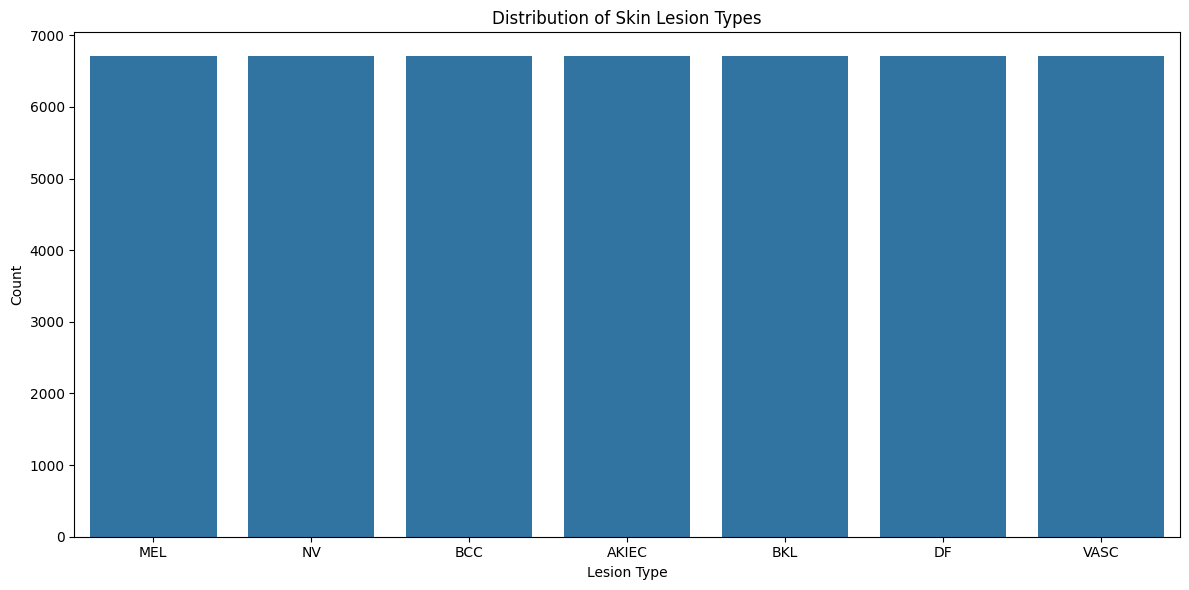


Lesion type counts:
MEL: 6703
NV: 6705
BCC: 6704
AKIEC: 6704
BKL: 6704
DF: 6704
VASC: 6704

Sample counts by split:
train: 37498
test: 4804
valid: 4626


In [10]:

from matplotlib import pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('D:\\T2420322 Dataset\\ham10K\\balanced_GroundTruth.csv')

# 1. Count and visualize lesion types
lesion_counts = df.iloc[:, 3:].sum()

# Create bar plot for lesion counts
plt.figure(figsize=(12, 6))
sns.barplot(x=lesion_counts.index, y=lesion_counts.values)
plt.title('Distribution of Skin Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()

# Print the counts
print("\nLesion type counts:")
for lesion_type, count in lesion_counts.items():
    print(f"{lesion_type}: {int(count)}")
split_counts = df['split'].value_counts()
print("\nSample counts by split:")
for split, count in split_counts.items():
    print(f"{split}: {count}")

# UNet Model implementation
---

Without NV aug

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid, tanh
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard, CSVLogger
import cv2
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt 
import gc
# from tensorflow.keras.callbacks import CSVLogger


In [14]:

import tensorflow.keras.backend as K

def precision(y_true, y_pred): 
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1))) 
    precision = true_positives / (predicted_positives + K.epsilon()) 
    return precision 

def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1))) 
    recall = true_positives / (possible_positives + K.epsilon()) 
    return recall 

def fbeta_score(y_true, y_pred, beta=1.0): 


    # If there are no true positives, fix the F score at 0 like sklearn. 
    if K.sum(K.round(K.clip(y_true, 0.0, 1.0))) == 0: 

        return 0.0 
    p = precision(y_true, y_pred) 
    r = recall(y_true, y_pred) 
    bb = beta*beta
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon()) 
    return fbeta_score 


def dice_coef(y_true, y_pred):
    smooth=1
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_coef_Thresh(y_true, y_pred):
    y_pred_thresh = tf.cast(y_pred + 0.5, tf.int32)
    y_pred_thresh = tf.cast(y_pred_thresh, tf.float32)
    smooth=1
    y_true = K.flatten(y_true)
    y_pred_thresh = K.flatten(y_pred_thresh)
    intersection = K.sum(y_true * y_pred_thresh)
    union = K.sum(y_true) + K.sum(y_pred_thresh)
    
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def bce_dice_coef_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return dice_coef_loss(y_true, y_pred) + 100*bce(y_true, y_pred)

def weighted_binary_crossentropy(y_true, y_pred):
    one_weight=4
    zero_weight=1
    b_ce = K.binary_crossentropy(y_true, y_pred)

    # weighted calc
    weight_vector = y_true * one_weight + (1 - y_true) * zero_weight
    weighted_b_ce = weight_vector * b_ce
    return K.mean(weighted_b_ce)

def iou(y_true, y_pred): #Jaccard Index
    smooth=1
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def iou_Thresh(y_true, y_pred): #Jaccard Index
    y_pred = tf.cast(y_pred + 0.5, tf.int32)
    y_pred = tf.cast(y_pred, tf.float32)
    smooth=1
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def iou_loss(y_true, y_pred): #Jaccard Index
    smooth=1
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return 1.0-jac

def mcc(y_true, y_pred): #matthews_correlation
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())


def fmeasure(y_true, y_pred): 
    
    return fbeta_score(y_true, y_pred, beta=1.0) 

def XOR_Error(y_true, y_pred):
    num = K.sum(K.abs(y_true-y_pred))
    den = K.sum(y_true)
    return num/(den+K.epsilon())

def XOR_Error_Thresh(y_true, y_pred):
    y_pred_thresh = tf.cast(y_pred + 0.5, tf.int32)
    y_pred_thresh = tf.cast(y_pred_thresh, tf.float32)
    num = K.sum(K.abs(y_true-y_pred_thresh))
    den = K.sum(y_true)
    return num/(den+K.epsilon())

def tversky(y_true, y_pred):
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    smooth = 1.0
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)

def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)


def focal_tversky(y_true,y_pred):
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)


In [18]:
def preprocess_images_and_masks_batch(image_paths, mask_paths, batch_size=32, target_size=(256, 256)):
    """
    Generator to yield batches of images and masks, reducing memory usage.
    """
    num_images = len(image_paths)
    for start in range(0, num_images, batch_size):
        end = min(start + batch_size, num_images)
        batch_images = []
        batch_masks = []
        
        for img_path, mask_path in zip(image_paths[start:end], mask_paths[start:end]):
            # Load and resize the image only if necessary
            img = load_img(img_path)
            if img.size != target_size:
                img = img.resize(target_size)  # Resize image if it's not already 256x256
            img = img_to_array(img) / 255.0  # Normalize image to [0, 1]
            batch_images.append(img)

            # Load and resize the mask only if necessary
            mask = load_img(mask_path, color_mode="grayscale")
            if mask.size != target_size:
                mask = mask.resize(target_size)  # Resize mask if it's not already 256x256
            mask = img_to_array(mask) / 255.0  # Normalize mask to [0, 1]
            mask = np.clip(mask, 0, 1)  # Ensure mask values are clipped to [0, 1]
            mask = (mask > 0.5).astype(bool)  # Binarize mask
            # mask = np.expand_dims(mask, axis=-1)  # Add channel dimension to mask
            batch_masks.append(mask)
        
        yield np.array(batch_images), np.array(batch_masks)
        # Free up memory after processing a batch
        gc.collect()

def load_split_data(csv_path, batch_size=32, target_size=(256, 256)):
    """
    Load and split the dataset based on the 'split' column in the CSV file and return data in batches.
    """
    # Read CSV file
    data = pd.read_csv(csv_path)

    # Filter by split
    train_data = data[data['split'] == 'train']
    valid_data = data[data['split'] == 'valid']
    test_data = data[data['split'] == 'test']

    # Get image and mask paths
    X_train_paths = train_data['image_path'].tolist()
    Y_train_paths = train_data['mask_path'].tolist()

    X_val_paths = valid_data['image_path'].tolist()
    Y_val_paths = valid_data['mask_path'].tolist()

    X_test_paths = test_data['image_path'].tolist()
    Y_test_paths = test_data['mask_path'].tolist()

    # Generate batches for each split
    train_batches = preprocess_images_and_masks_batch(X_train_paths, Y_train_paths, batch_size, target_size)
    valid_batches = preprocess_images_and_masks_batch(X_val_paths, Y_val_paths, batch_size, target_size)
    test_batches = preprocess_images_and_masks_batch(X_test_paths, Y_test_paths, batch_size, target_size)

    return train_batches, valid_batches, test_batches

# Path to your CSV file
csv_path = "D:\\T2420322 Dataset\\ham10K\\balanced_GroundTruth.csv"

# Load the data splits in batches
train_batches, valid_batches, test_batches = load_split_data(csv_path, batch_size=32, target_size=(256, 256))

# Example: Accessing one batch of training images and masks
X_train_batch, Y_train_batch = next(train_batches)
print(f"Batch size: {X_train_batch.shape}, {Y_train_batch.shape}")


Batch size: (32, 256, 256, 3), (32, 256, 256, 1)


In [19]:
def build_unet(input_shape=(256, 256, 3), output_channels=1):
    """
    Build U-Net architecture for image segmentation.
    
    Args:
        input_shape (tuple): Input image dimensions
        output_channels (int): Number of output segmentation channels
    
    Returns:
        tf.keras.Model: Compiled U-Net model
    """
    # Input layer
    inputs = tf.keras.layers.Input(input_shape)
    
    # Normalize inputs
    x = tf.keras.layers.Lambda(lambda x: x / 255.0)(inputs)

    # Contraction Path (Encoder)
    # Block 1
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    drop1 = tf.keras.layers.Dropout(0.1)(pool1)

    # Block 2
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(drop1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    drop2 = tf.keras.layers.Dropout(0.2)(pool2)

    # Block 3
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(drop2)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    drop3 = tf.keras.layers.Dropout(0.3)(pool3)

    # Block 4
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(drop3)
    conv4 = tf.keras.layers.BatchNormalization()(conv4)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    conv4 = tf.keras.layers.BatchNormalization()(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    drop4 = tf.keras.layers.Dropout(0.4)(pool4)

    # Bridge
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(drop4)
    conv5 = tf.keras.layers.BatchNormalization()(conv5)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    conv5 = tf.keras.layers.BatchNormalization()(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)

    # Expansion Path (Decoder)
    # Block 6
    up6 = tf.keras.layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    concat6 = tf.keras.layers.Concatenate()([up6, conv4])
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(concat6)
    conv6 = tf.keras.layers.BatchNormalization()(conv6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)
    conv6 = tf.keras.layers.BatchNormalization()(conv6)
    drop6 = tf.keras.layers.Dropout(0.4)(conv6)

    # Block 7
    up7 = tf.keras.layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(drop6)
    concat7 = tf.keras.layers.Concatenate()([up7, conv3])
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(concat7)
    conv7 = tf.keras.layers.BatchNormalization()(conv7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)
    conv7 = tf.keras.layers.BatchNormalization()(conv7)
    drop7 = tf.keras.layers.Dropout(0.3)(conv7)

    # Block 8
    up8 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(drop7)
    concat8 = tf.keras.layers.Concatenate()([up8, conv2])
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(concat8)
    conv8 = tf.keras.layers.BatchNormalization()(conv8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)
    conv8 = tf.keras.layers.BatchNormalization()(conv8)
    drop8 = tf.keras.layers.Dropout(0.2)(conv8)

    # Block 9
    up9 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(drop8)
    concat9 = tf.keras.layers.Concatenate()([up9, conv1])
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(concat9)
    conv9 = tf.keras.layers.BatchNormalization()(conv9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = tf.keras.layers.BatchNormalization()(conv9)
    drop9 = tf.keras.layers.Dropout(0.1)(conv9)

    # Output layer
    outputs = tf.keras.layers.Conv2D(output_channels, 1, activation='sigmoid')(drop9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model
build_unet(input_shape=(256, 256, 3), output_channels=1)

<Functional name=functional, built=True>

In [27]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

# Directories for logs and weights
log_destination = 'D:\\Thesis work\\Skin_cancer\\trial01\\Logs'
weight_destination = 'D:\\Thesis work\\Skin_cancer\\trial01\\Weights'

# Ensure directories exist
os.makedirs(log_destination, exist_ok=True)
os.makedirs(weight_destination, exist_ok=True)

# Unique run ID
run_id = 'Unet'

# File paths
weight_file = os.path.join(weight_destination, f'{run_id}.weights.h5')
log_dir = os.path.join(log_destination, run_id)

hist_csv_file = os.path.join(weight_destination, f'{run_id}.csv')
csv_logger = CSVLogger(hist_csv_file, append=True)


In [34]:
#Unet
model1 = build_unet(input_shape=(256, 256, 3), output_channels=1)
model1.compile(loss= dice_coef_loss, # 'categorical_crossentropy', #'binary_crossentropy' ..  .. weighted_binary_crossentropy .. weighted_binary_crossentropy
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy',precision, recall, dice_coef, iou, mcc, XOR_Error])

monitor_ = 'val_dice_coef'
mode_ = 'max'

weight_saver = ModelCheckpoint(weight_file, 
                               monitor=monitor_,
                               mode =mode_,
                               save_best_only=True,
                               save_weights_only=True,
                               verbose=1)

annealer = ReduceLROnPlateau(monitor='loss',
                             factor=0.5,
                             patience=5,
                             min_lr=1e-8,
                             verbose=1)
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True,
#     verbose=1
# )
factor = 32 #Batch size


In [35]:

# Calculate steps per epoch and validation steps manually
train_size = len([1 for _ in train_batches])  # Count the number of batches in the train generator
valid_size = len([1 for _ in valid_batches])  # Count the number of batches in the validation generator

history = model.fit(
    train_batches,  # Use the batch generator for training data
    validation_data=valid_batches,  # Use the batch generator for validation data
    epochs=50,
    callbacks=[
        checkpoint,
        tensorboard_callback,
        # early_stopping,
        reduce_lr,
        csv_logger,
        TqdmCallback(verbose=1)
    ],
    steps_per_epoch=train_size,  # Number of steps per epoch (number of batches)
    validation_steps=valid_size,  # Number of validation steps (number of batches)
    verbose=1
)

----
bad

---

In [ ]:
# Create model
model = build_unet(input_shape=(256, 256, 3), output_channels=1)

# Compile model with custom metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=dice_loss,
    metrics=[
        dice_coefficient, 
        'accuracy', 
        precision, 
        recall, 
        specificity, 
        pixel_accuracy, 
        iou
    ]
)

# Callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_dice_coefficient',
        mode='max',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_dice_coefficient',
        factor=0.1,
        patience=5,
        verbose=1,
        mode='max',
        min_lr=1e-7
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_dice_coefficient',
        patience=9,
        verbose=1,
        mode='max',
        restore_best_weights=True
    ),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

# Train model
history = model.fit(
    train_gen, 
    validation_data=valid_gen,
    epochs=100,
    
    steps_per_epoch=train_steps, validation_steps=valid_steps,
    callbacks=callbacks
)

Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024329.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024329_aug_1.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024329_aug_2.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024329_aug_3.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024372.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024372_aug_1.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024372_aug_2.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024372_aug_3.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024418.png
Mask not found: D:\T2420322 Dataset\ham10K\aug_split_data01\AKIEC\train\masks\ISIC_0024418_aug_1.png
Mask not

TypeError: 'numpy.float64' object cannot be interpreted as an integer